<a href="https://colab.research.google.com/github/Divya9812123/Customer_segmentation_01/blob/main/p4_customer_segemntation_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name : Customer Segmentation Using Machine Learning

In [38]:
#Perfomred both unsupervised and supervised leaning


Problem Statement: Customer Segmentation Using Machine Learning
Businesses struggle to understand customer behavior, leading to inefficient marketing and resource allocation. This project aims to segment customers based on demographic and purchase data using machine learning (e.g., K-Means). The insights will help in personalized marketing, customer retention, and revenue optimization.

#### Time line of  Project


###### 1.Importing Libraies
###### 2.Data Preprocessing
###### 3.EDA
###### 4.Model Building
##### 5.Evalution



#### 1.Importing Librarires

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image, display
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


#### 2.Data Cleaning & Preprocessing

In [40]:
df=pd.read_csv("/content/Mall_Customers (2).csv")

In [41]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


In [43]:
df.shape

(200, 5)

In [44]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [45]:
df.duplicated().sum()

np.int64(0)

In [46]:
#Setting 'CustomerID' as the index

In [47]:
df=df.set_index("CustomerID")

In [48]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [50]:
le=LabelEncoder()

In [51]:
le.fit(df["Gender"])

LabelEncoder()

In [52]:
df["Gender"]=le.transform(df["Gender"])

In [53]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81


In [54]:
df["Gender"].value_counts()

,count
Gender,
0,112
1,88


In [55]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


#### 3.EDA

In [56]:
#Distribution of Age ,Annual Income & Spending score

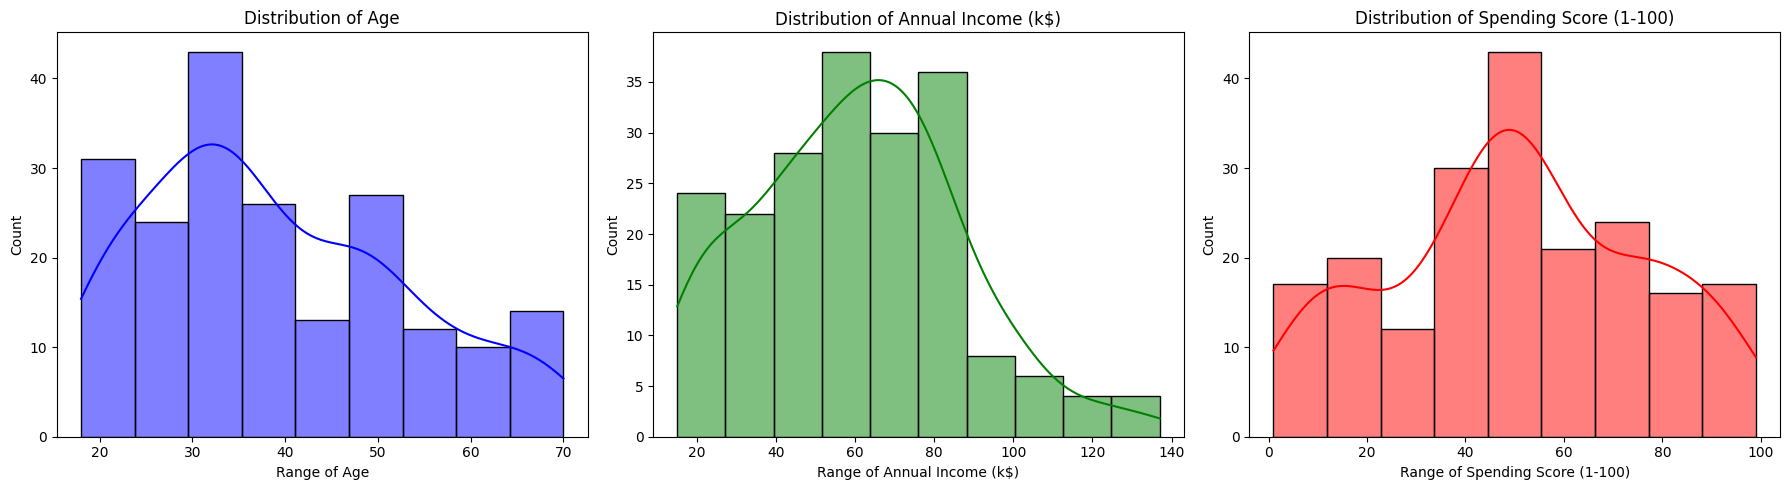

In [57]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df["Age"], kde=True, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.histplot(df["Annual Income (k$)"], kde=True, color="green")
plt.title("Distribution of Annual Income (k$)")
plt.xlabel("Range of Annual Income (k$)")
plt.ylabel("Count")


plt.subplot(1, 3, 3)
sns.histplot(df["Spending Score (1-100)"], kde=True, color="red")
plt.title("Distribution of Spending Score (1-100)")
plt.xlabel("Range of Spending Score (1-100)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [58]:
# Gender Proportion (Pie Chart)

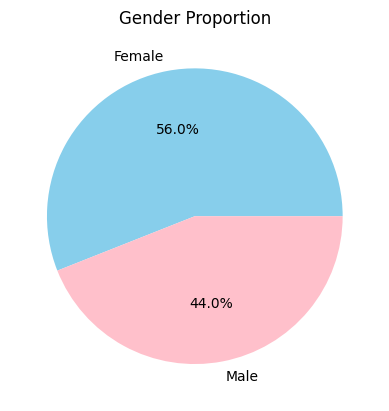

In [59]:
# Gender proportion
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=[ 'Female','Male'], autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Gender Proportion')
plt.show()


In [60]:
#most visited  customer (Age)

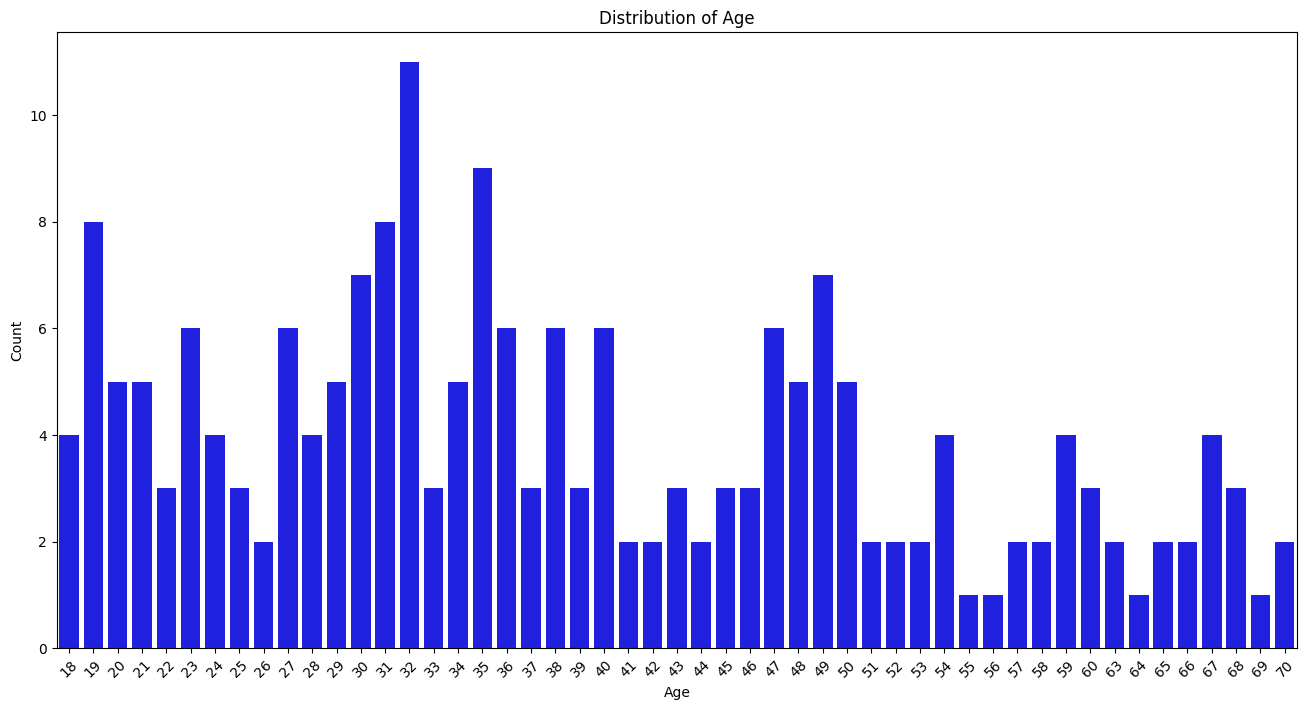

In [61]:
plt.figure(figsize=(16, 8))
sns.countplot(x="Age", data=df, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


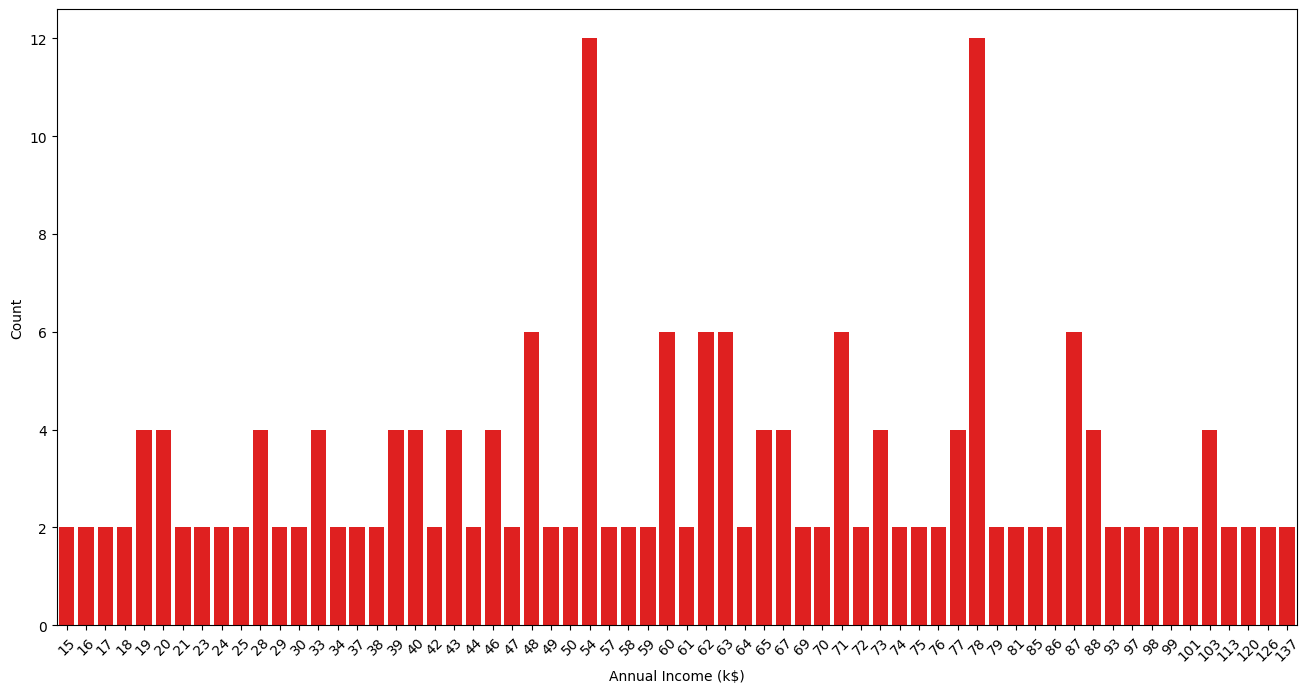

In [62]:
plt.figure(figsize=(16, 8))
sns.countplot(x="Annual Income (k$)", data=df, color="red")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [63]:
 # Correlation Analysis

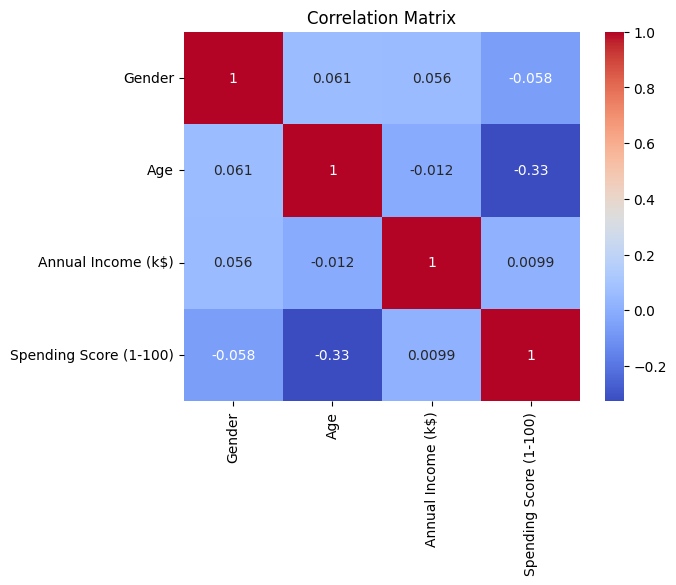

In [64]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


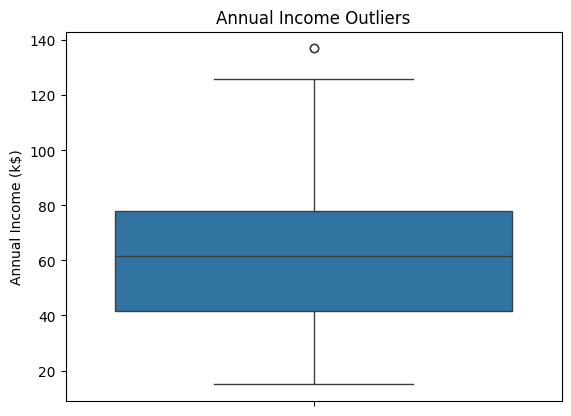

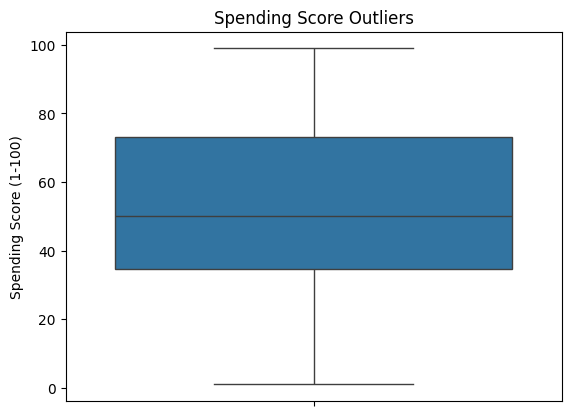

In [65]:
# Box Plot for Outlier Detection
sns.boxplot(df['Annual Income (k$)'])
plt.title('Annual Income Outliers')
plt.show()

sns.boxplot(df['Spending Score (1-100)'])
plt.title('Spending Score Outliers')
plt.show()


#### 4.Model Building

In [66]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [67]:
X=df[["Annual Income (k$)","Spending Score (1-100)"]]

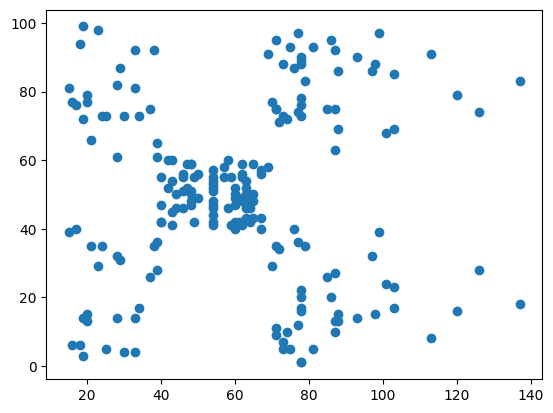

In [68]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.show()

In [69]:
#Elbow method

In [70]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

In [71]:
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.471609793436,
 23103.122085983905]

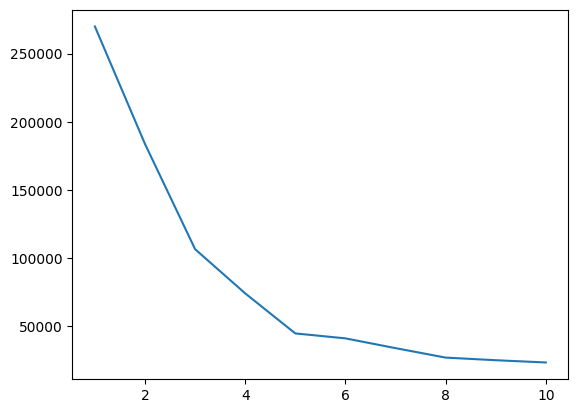

In [72]:
plt.plot(range(1,11),wcss)
plt.show()

In [73]:
#apply kmeans algo

In [74]:
km=KMeans(n_clusters=5,random_state=42)
X["Clusters"]=km.fit_predict(X)

In [75]:
X.head()

,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,
1,15,39,4
2,15,81,2
3,16,6,4
4,16,77,2
5,17,40,4


In [76]:
X["Clusters"].unique()

array([4, 2, 0, 1, 3], dtype=int32)

In [77]:
X["Clusters"].value_counts()

,count
Clusters,
0,81
1,39
3,35
4,23
2,22


In [78]:
#visualize the clusters

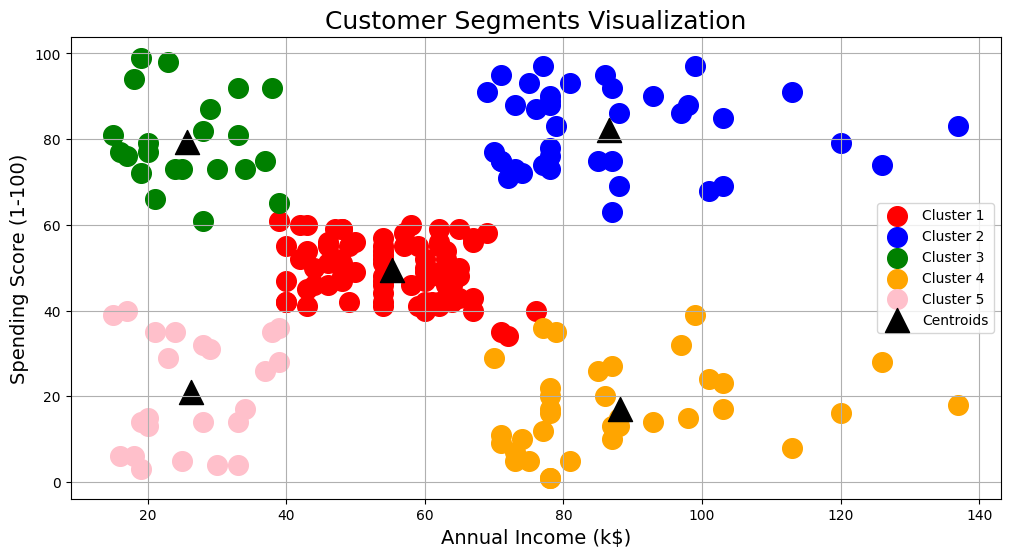

In [79]:
plt.figure(figsize=(12, 6))

# Cluster 1
plt.scatter(X[X["Clusters"] == 0]["Annual Income (k$)"],
            X[X["Clusters"] == 0]["Spending Score (1-100)"],
            s=200, c="red", label="Cluster 1")

# Cluster 2
plt.scatter(X[X["Clusters"] == 1]["Annual Income (k$)"],
            X[X["Clusters"] == 1]["Spending Score (1-100)"],
            s=200, c="blue", label="Cluster 2")

# Cluster 3
plt.scatter(X[X["Clusters"] == 2]["Annual Income (k$)"],
            X[X["Clusters"] == 2]["Spending Score (1-100)"],
            s=200, c="green", label="Cluster 3")

# Cluster 4
plt.scatter(X[X["Clusters"] == 3]["Annual Income (k$)"],
            X[X["Clusters"] == 3]["Spending Score (1-100)"],
            s=200, c="orange", label="Cluster 4")

# Cluster 5
plt.scatter(X[X["Clusters"] == 4]["Annual Income (k$)"],
            X[X["Clusters"] == 4]["Spending Score (1-100)"],
            s=200, c="pink", label="Cluster 5")




# Adding centroids
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            s=300, c="black", marker="^", label="Centroids")

plt.title("Customer Segments Visualization", fontsize=18)
plt.xlabel("Annual Income (k$)", fontsize=14)
plt.ylabel("Spending Score (1-100)", fontsize=14)
plt.legend()
plt.grid()
plt.show()


In [80]:
#Predict

In [81]:
km.predict([[15,45]])

array([4], dtype=int32)

In [82]:
km.predict([[100,25]])

array([3], dtype=int32)

####  Save Model

In [83]:
import joblib
joblib.dump(km,"Customer_Segmentation")

['Customer_Segmentation']

In [84]:
model=joblib.load("Customer_Segmentation")

In [85]:
model.predict([[15,30]])

array([4], dtype=int32)

#### Data Segmentation

In [86]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [87]:
X["Clusters"]

,Clusters
CustomerID,
1,4
2,2
3,4
4,2
5,4
...,...
196,1
197,3
198,1


In [88]:
df["Clusters"] = X["Clusters"]


In [89]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,1,19,15,39,4
2,1,21,15,81,2


In [90]:
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
Clusters,0


In [91]:
cols=df.columns
cols

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Clusters'],
      dtype='object')

In [92]:
#check for clusters columns

In [93]:
df.groupby("Clusters")[["Age","Annual Income (k$)","Spending Score (1-100)"]].agg("mean")

,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


<Axes: xlabel='Clusters'>

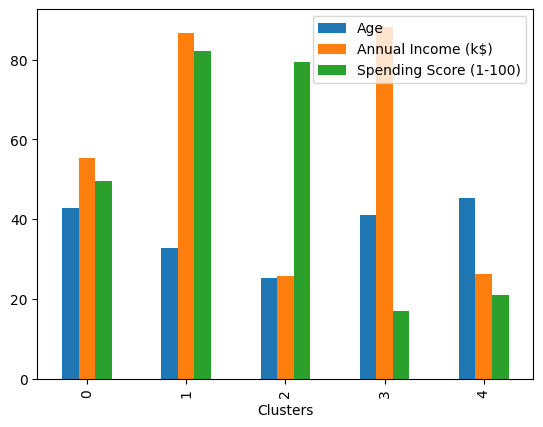

In [94]:
df.groupby("Clusters")[["Age","Annual Income (k$)","Spending Score (1-100)"]].agg("mean").plot(kind="bar")

In [95]:
df.groupby("Gender")[["Age","Annual Income (k$)","Spending Score (1-100)"]].agg("mean")

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
0,38.098214,59.250000,51.526786
1,39.806818,62.227273,48.511364


<Axes: xlabel='Gender'>

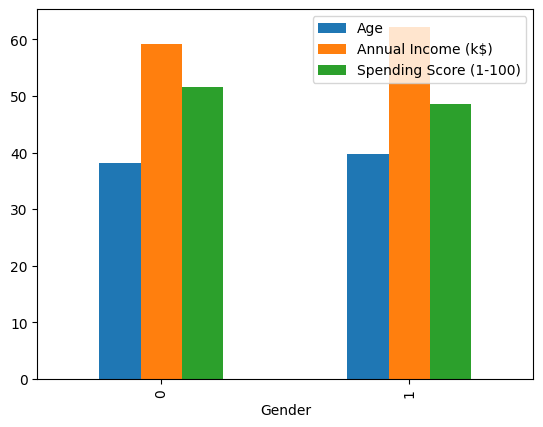

In [96]:
df.groupby("Gender")[["Age","Annual Income (k$)","Spending Score (1-100)"]].agg("mean").plot(kind="bar")

In [97]:
X1 = df.iloc[:, :-1]
Y1=df["Clusters"]

In [98]:
X1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [99]:
Y1.unique()

array([4, 2, 0, 1, 3], dtype=int32)

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

In [102]:
dct=DecisionTreeClassifier()

In [103]:
dct.fit(X1_train,Y1_train)

DecisionTreeClassifier()

In [104]:
y_pred=dct.predict(X1_test)

In [105]:
accuracy = accuracy_score(Y1_test, y_pred)

# Calculate Precision
precision = precision_score(Y1_test, y_pred, average='macro')

# Generate Confusion Matrix
conf_matrix = confusion_matrix(Y1_test, y_pred)

In [106]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 97.50%
Precision: 98.95%
Confusion Matrix:
[[18  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0 10  0]
 [ 0  0  0  0  3]]


In [107]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X1_train, Y1_train)

# Make predictions on the test set
y_pred = rf_model.predict(X1_test)

accuracy = accuracy_score(Y1_test, y_pred)

precision = precision_score(Y1_test, y_pred, average='macro')

# Generate Confusion Matrix
conf_matrix = confusion_matrix(Y1_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 100.00%
Precision: 100.00%
Confusion Matrix:
[[18  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0  3]]


In [108]:
rf_model.predict([[1,20,15,30]])

array([4], dtype=int32)